## Problem Statement
 Stroke is a leading cause of death and long-term disability worldwide. Early identification of individuals at high risk for stroke can lead to timely interventions and improved outcomes. However, current methods for assessing stroke risk often rely on clinical assessments that may not be comprehensive or timely.
This project aims to develop and evaluate supervised machine learning models to predict stroke risk using patient demographic, medical, and lifestyle data.

## Importing Libraries
```python
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
```

In [270]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

## Importing Dataset

In [271]:
stroke_data = pd.read_csv('dataset/healthcare-dataset-stroke-data.csv')

In [272]:
stroke_data.head(15)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
6,53882,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1
7,10434,Female,69.0,0,0,No,Private,Urban,94.39,22.8,never smoked,1
8,27419,Female,59.0,0,0,Yes,Private,Rural,76.15,NaN,Unknown,1
9,60491,Female,78.0,0,0,Yes,Private,Urban,58.57,24.2,Unknown,1


Data consists of both categorical and numerical features, including:
- `id`: Unique identifier for each patient
- `gender` : Male or Female
- `age`: Age of the patient
- `hypertension`: Whether the patient has hypertension (1) or not (0)
- `heart_disease`: Whether the patient has heart disease (1) or not (0)
- `ever_married`: Whether the patient has ever been married (Yes or No)
- `work_type`: Type of work the patient does (e.g., Private, Self-employed, Government, Children, Never_worked)
- `Residence_type`: Type of residence (Urban or Rural)
- `avg_glucose_level`: Average glucose level in the blood
- `bmi`: Body Mass Index
- `smoking_status`: Smoking status of the patient (e.g., formerly smoked, never smoked, smokes, unknown)
- `stroke`: Whether the patient has had a stroke (1) or not (0) 


In [273]:
stroke_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [274]:
stroke_data.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [275]:
stroke_data.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

## Analyzing the Features

## Age

In [276]:
stroke_data.age.isnull().sum()

np.int64(0)

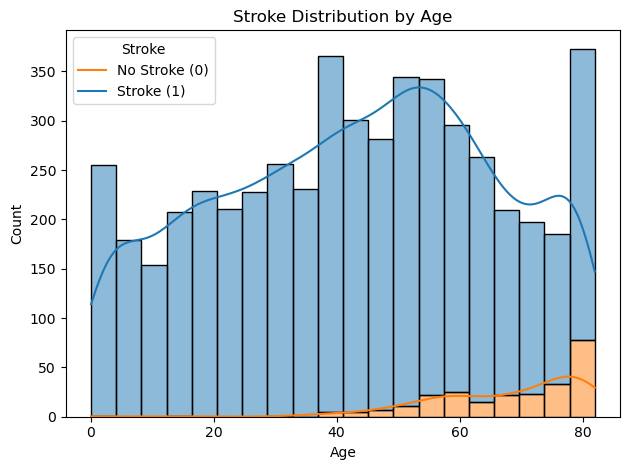

In [277]:
sns.histplot(data=stroke_data, x='age', hue='stroke' , multiple='stack', kde=True)  

# Labeling
plt.title('Stroke Distribution by Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend(title='Stroke', labels=['No Stroke (0)', 'Stroke (1)'])
plt.tight_layout()
plt.show()

## Gender

In [278]:
stroke_data['gender'].value_counts()

gender
Female    2994
Male      2115
Other        1
Name: count, dtype: int64

In [279]:
stroke_data[stroke_data['gender'] == 'Other']

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
3116,56156,Other,26.0,0,0,No,Private,Rural,143.33,22.4,formerly smoked,0


In [280]:
# since there is only one record that consists Gender as 'Other', we can replace it with the most common or most occuered gender 
print(stroke_data['gender'].mode()[0])  # This will give us the most common gender
# replacing 'Other' with the most common
stroke_data = stroke_data.replace({'Other': 'Female'})

Female


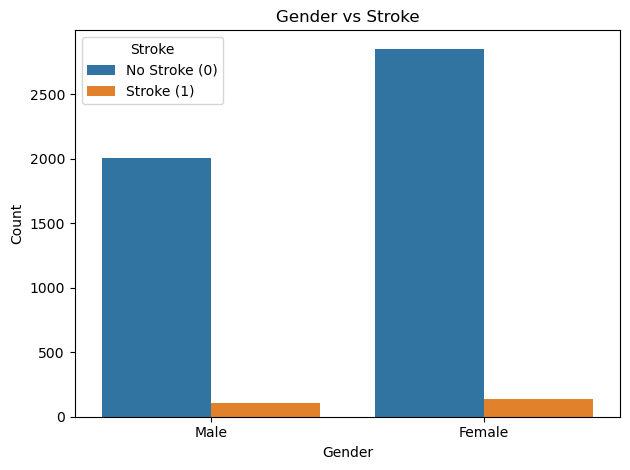

In [ ]:
sns.countplot(data=stroke_data, x='gender', hue='stroke')
plt.title('Gender vs Stroke')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Stroke', labels=['No Stroke (0)', 'Stroke (1)'])
plt.tight_layout()
plt.show()

## Ever Married (Marital Status)


In [283]:
stroke_data.ever_married.value_counts()

ever_married
Yes    3353
No     1757
Name: count, dtype: int64

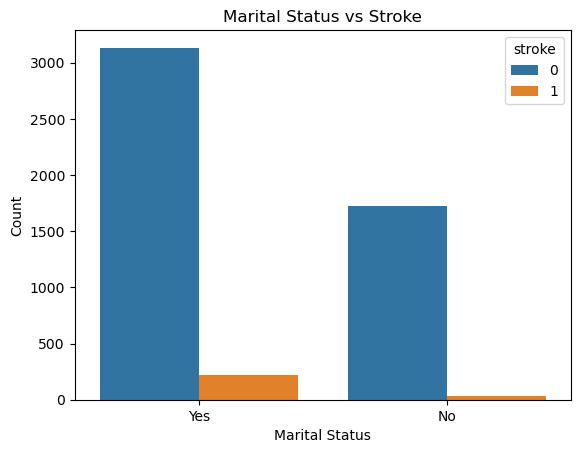

In [284]:
sns.countplot(data=stroke_data, x='ever_married', hue='stroke')
plt.title('Marital Status vs Stroke')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.show()

## Work Type

In [285]:
stroke_data.work_type.value_counts()

work_type
Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: count, dtype: int64

In [286]:
stroke_data.replace({'children': 'Children', 'Self-employed': 'Self Employed', 'Govt_job': 'Government Job', 'Never_worked': 'Never Worked'}, inplace=True)

In [287]:
stroke_data.work_type.value_counts()

work_type
Private           2925
Self Employed      819
Children           687
Government Job     657
Never Worked        22
Name: count, dtype: int64

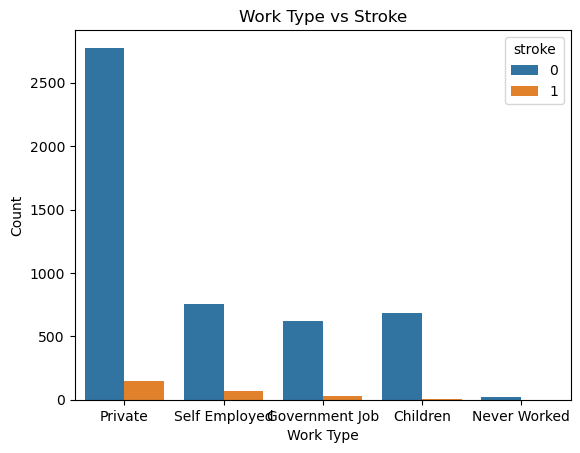

In [288]:
sns.countplot(data=stroke_data, x='work_type', hue='stroke')
plt.title('Work Type vs Stroke')
plt.xlabel('Work Type')
plt.ylabel('Count')
plt.show()


## Residence Type

In [289]:
stroke_data.Residence_type.value_counts()

Residence_type
Urban    2596
Rural    2514
Name: count, dtype: int64

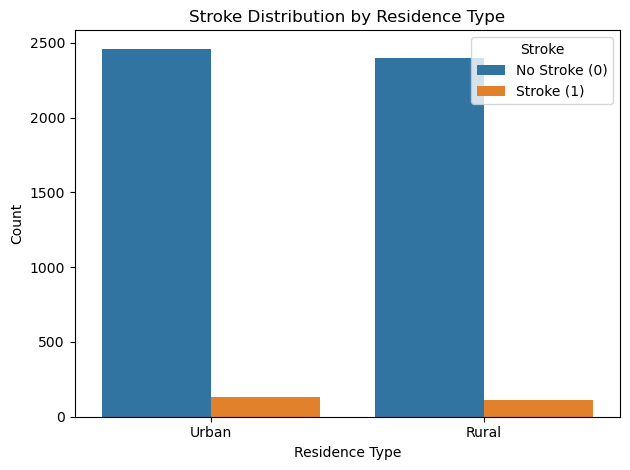

In [290]:
sns.countplot(data=stroke_data, x='Residence_type', hue='stroke')
plt.title('Stroke Distribution by Residence Type')
plt.xlabel('Residence Type')
plt.ylabel('Count')
plt.legend(title='Stroke', labels=['No Stroke (0)', 'Stroke (1)'])
plt.tight_layout()
plt.show()

## Smoking Status

In [291]:
stroke_data.smoking_status.value_counts()

smoking_status
never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: count, dtype: int64

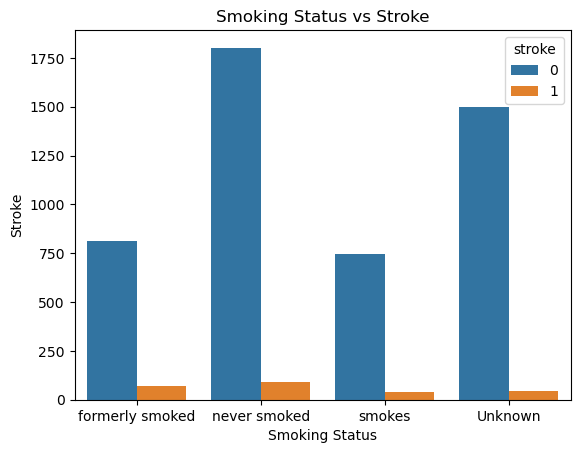

In [292]:
sns.countplot(data=stroke_data, x='smoking_status', hue='stroke')
plt.title('Smoking Status vs Stroke')
plt.xlabel('Smoking Status')
plt.ylabel('Stroke')
plt.show()

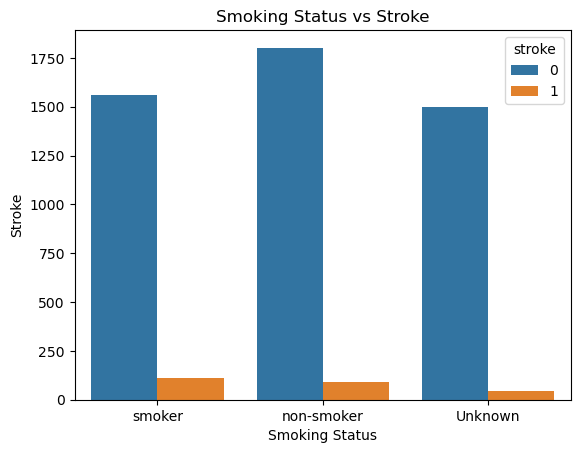

In [293]:
# we can combine the 'formerly smoked' and 'smokes' categories into a single 'smoker' category
stroke_data['smoking_status'] = stroke_data['smoking_status'].replace({'formerly smoked': 'smoker', 'smokes': 'smoker' , 'never smoked': 'non-smoker'})    
sns.countplot(data=stroke_data, x='smoking_status', hue='stroke')
plt.title('Smoking Status vs Stroke')
plt.xlabel('Smoking Status')
plt.ylabel('Stroke')
plt.show()


## Hypertension

In [294]:
stroke_data.hypertension.value_counts()

hypertension
0    4612
1     498
Name: count, dtype: int64

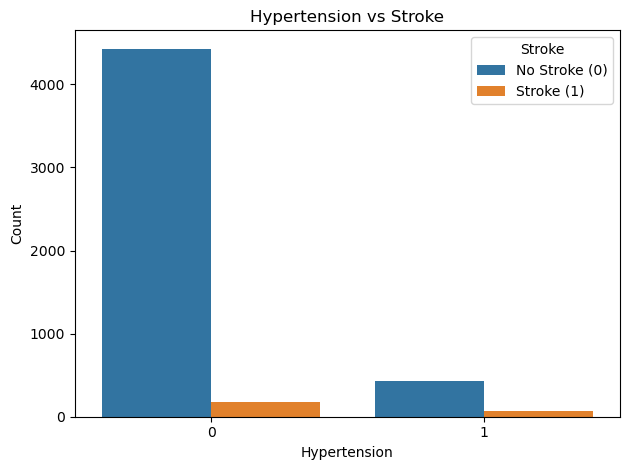

In [295]:
sns.countplot(x='hypertension', data=stroke_data, hue='stroke')
plt.title('Hypertension vs Stroke')
plt.xlabel('Hypertension')
plt.ylabel('Count')
plt.legend(title='Stroke', labels=['No Stroke (0)', 'Stroke (1)'])
plt.tight_layout()
plt.show()

## Heart Disease

In [296]:
stroke_data.heart_disease.value_counts()

heart_disease
0    4834
1     276
Name: count, dtype: int64

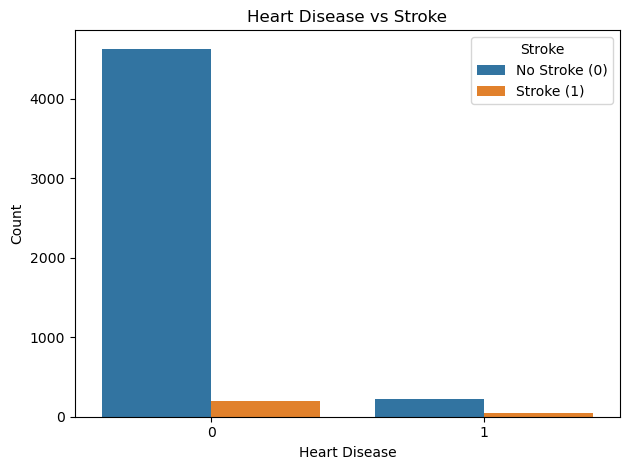

In [297]:
sns.countplot(x='heart_disease', data=stroke_data, hue='stroke')
plt.title('Heart Disease vs Stroke')
plt.xlabel('Heart Disease')
plt.ylabel('Count')
plt.legend(title='Stroke', labels=['No Stroke (0)', 'Stroke (1)'])
plt.tight_layout()
plt.show()

## Avg Glucose Level

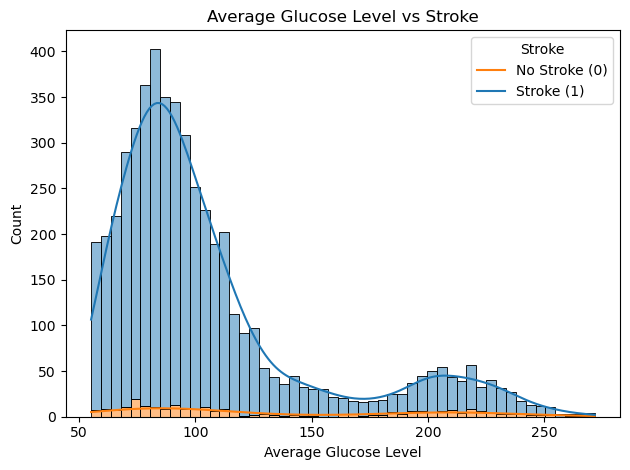

In [298]:
# distribution of average glucose level with respect to stroke
sns.histplot(data=stroke_data, x='avg_glucose_level', hue='stroke', multiple='stack', kde=True)
plt.title('Average Glucose Level vs Stroke')
plt.xlabel('Average Glucose Level')
plt.ylabel('Count')
plt.legend(title='Stroke', labels=['No Stroke (0)', 'Stroke (1)'])
plt.tight_layout()
plt.show()

## BMI

In [299]:
# BMI
stroke_data['bmi'].isnull().sum()

np.int64(201)

In [300]:
stroke_data['bmi'] = stroke_data['bmi'].fillna(round (stroke_data['bmi'].median(), 2))
stroke_data.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

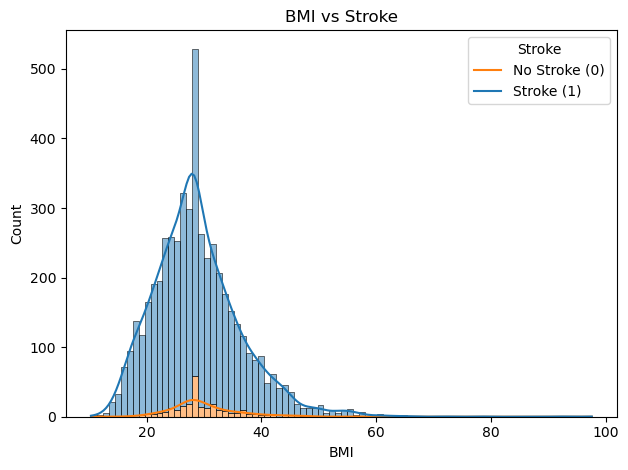

In [301]:
# distribution of BMI with respect to stroke
sns.histplot(data=stroke_data, x='bmi', hue='stroke', multiple='stack', kde=True)
plt.title('BMI vs Stroke')
plt.xlabel('BMI')
plt.ylabel('Count')
plt.legend(title='Stroke', labels=['No Stroke (0)', 'Stroke (1)'])
plt.tight_layout()
plt.show()  

## Data Visualization

In [302]:
stroke_data.drop('id', inplace=True , axis=1)


In [303]:
stroke_data.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,smoker,1
1,Female,61.0,0,0,Yes,Self Employed,Rural,202.21,28.1,non-smoker,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,non-smoker,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smoker,1
4,Female,79.0,1,0,Yes,Self Employed,Rural,174.12,24.0,non-smoker,1


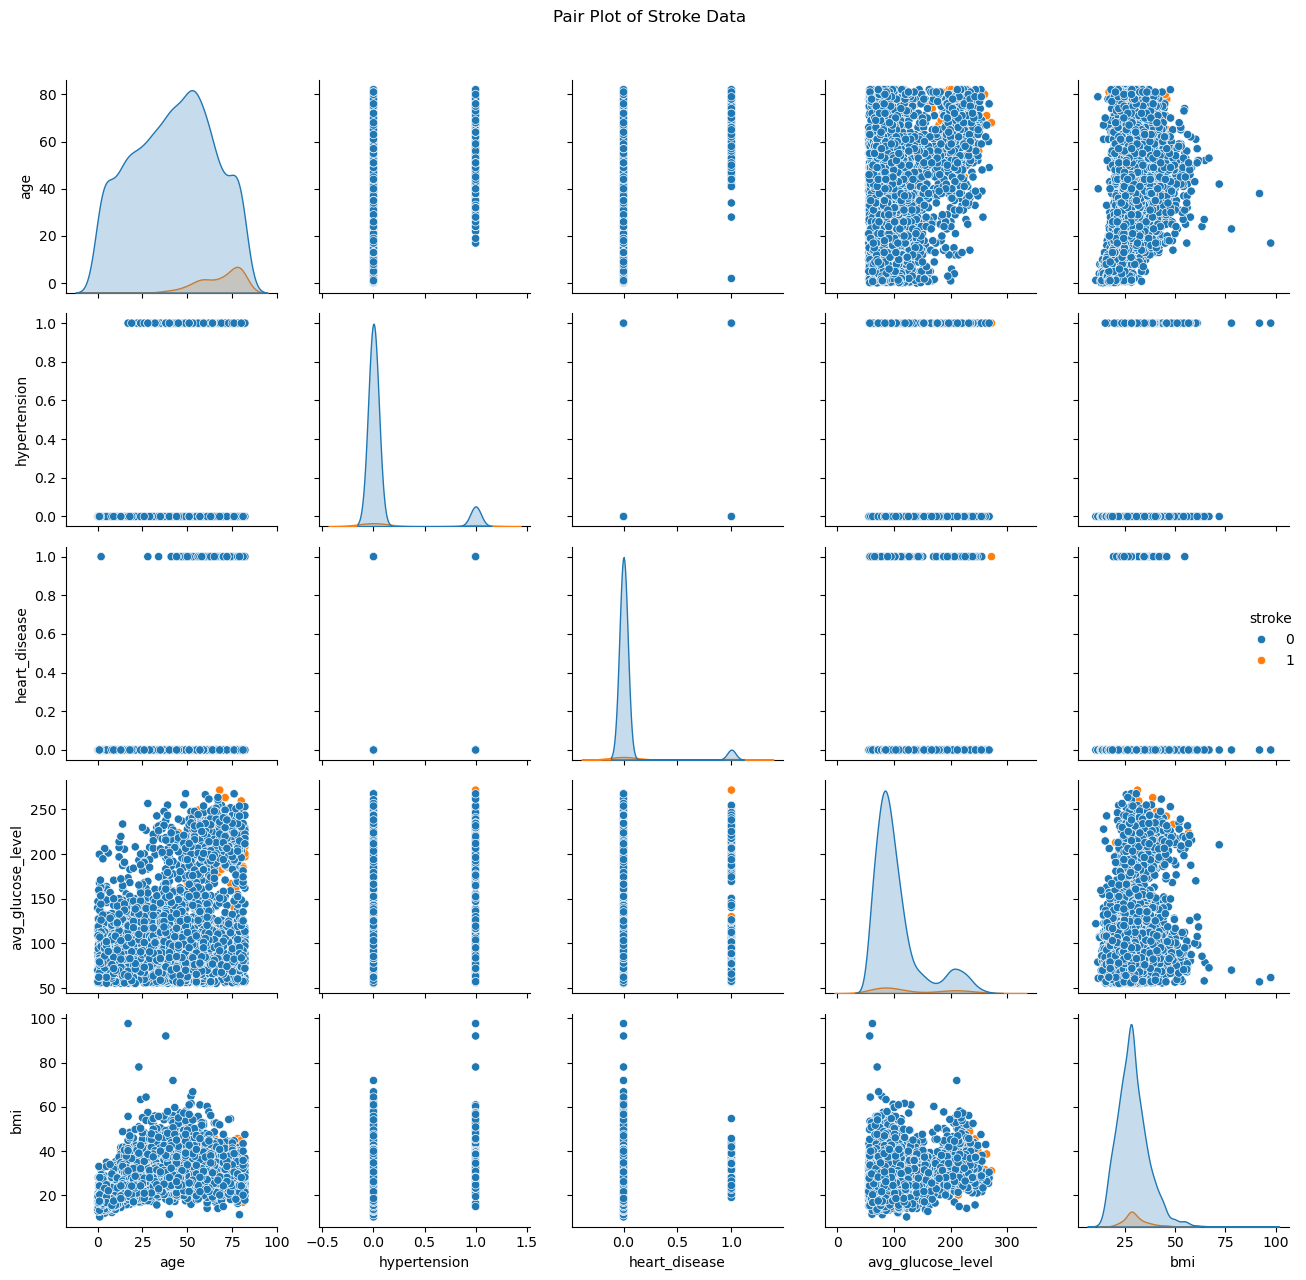

In [304]:
sns.pairplot(stroke_data, hue='stroke' , diag_kind='kde')
plt.suptitle('Pair Plot of Stroke Data', y=1.02)
plt.tight_layout()
plt.show()

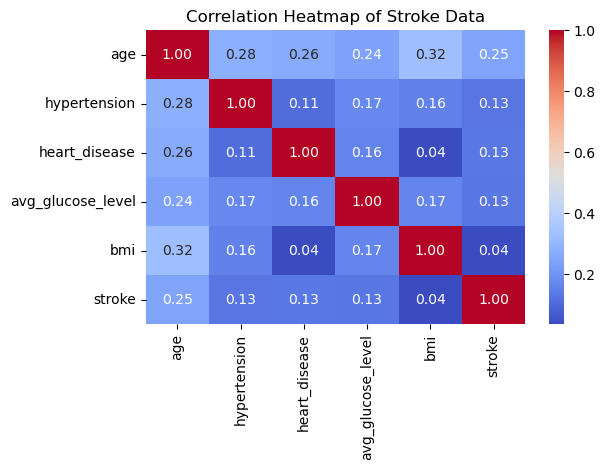

In [ ]:
numeric_cols = stroke_data.select_dtypes(include=['float64', 'int64'])
sns.heatmap(numeric_cols.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Stroke Data')
plt.tight_layout()
plt.show()


## Verdict of the Analysis
- Hypertension and heart disease are significant risk factors for stroke.
- Average glucose level and BMI are also important indicators of stroke risk.
- Age is a critical factor, with older individuals at higher
- In Work Type 
    - Private, Self-employed and Government Job individuals have a risk of stroke.
    - Whereas Children and Never_worked individuals have a negligible risk of stroke.
- Smoking status also plays a role, with those who smoke or have smoked previously being at higher risk.
- Gender do appear to have an impact on stroke risk but not as significant as other factors.
- Marital do show some correlation with stroke risk but is not as pronounced as other factors.
- Residence type does not show a significant difference in stroke risk. Hence it can be considered as a less significant factor.
- The distribution of age shows that stroke cases are more prevalent in older age groups.
- The distribution of average glucose levels indicates that higher glucose levels are associated with stroke risk.
- The distribution of BMI shows that higher BMI values are associated with stroke risk.
- The distribution of work types indicates that Private and Self-employed individuals have a higher risk of stroke
- The distribution of smoking status shows that those who smoke or have smoked previously are at higher risk of stroke.
- The distribution of stroke cases is skewed, with a higher number of non-stroke cases compared to stroke cases.


In [306]:
# removing residence type 
stroke_data.drop('Residence_type', inplace=True, axis=1)

In [307]:
stroke_data.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,228.69,36.6,smoker,1
1,Female,61.0,0,0,Yes,Self Employed,202.21,28.1,non-smoker,1
2,Male,80.0,0,1,Yes,Private,105.92,32.5,non-smoker,1
3,Female,49.0,0,0,Yes,Private,171.23,34.4,smoker,1
4,Female,79.0,1,0,Yes,Self Employed,174.12,24.0,non-smoker,1


## Saving the Preprocessed Data
```python
stroke_data.to_csv('preprocessed_stroke_data.csv', index=False)
```

In [308]:
stroke_data.to_csv('preprocessed_stroke_data.csv', index=False)
